<a href="https://colab.research.google.com/github/chminPark/ml-python/blob/master/%EC%8B%A4%EC%8A%B5_%EB%B0%98%EB%8F%84%EC%B2%B4%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%B6%84%EB%A5%98_MLP_%5B%EC%A1%B0%EA%B5%90%EC%9A%A9%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install python-csv # CSV처리 library
!pip install gdown  # google drive에서 다운로으 지원 함수
!pip install opencv-python # 이미지 처리 함수

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.5/131.5 kB 5.6 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!gdown --id 1nOUWByW6ifnd_P-Jgd4mbNkAT-jGzpWC
!mkdir 'semicon'
!unzip -q semiconductor_dataset.zip -d semicon
!rm semiconductor_dataset.zip

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1nOUWByW6ifnd_P-Jgd4mbNkAT-jGzpWC
To: /content/semiconductor_dataset.zip
100% 10.3M/10.3M [00:00<00:00, 135MB/s]


In [ ]:
# 현재 데이터가 저장되어 있는 folder의 위치
import os
print(os.listdir('semicon'))
print(os.getcwd())

['abnorm_8', 'abnorm_6', 'abnorm_10', 'abnorm_4', 'abnorm_5', 'abnorm_1', 'abnorm_9', 'abnorm_3', 'abnorm_2', 'normal_0', 'abnorm_7']
/content


In [ ]:
import csv
import os
import pandas as pd
"""
Args:
  directory_string: 이미지가 저장되어 있는 폴더 Path
  output_csv_name: csv 파일 이름
Returns:
  csv file
"""
def build_csv(directory_string, output_csv_name):

    directory = directory_string
    class_list = os.listdir(directory)
    class_list.sort()


    with open(output_csv_name, 'w', newline='') as csvfile:

        ### 실습 : CSV 파일 Object 생성
        writer = csv.writer(csvfile, delimiter=',')
        ############################################
        writer.writerow(['file_name', 'file_path', 'class_name', 'class_index']) # CSV의 column 이름을 지정

        ###### 각 folder에 들어가서 각 이미지의 이름을 가져옴
        for class_name in class_list:
          class_path = os.path.join(directory, class_name)
          file_list = os.listdir(class_path) # 해당 파일 내부의 이미지를 확보
          for file_name in file_list:
              file_path = os.path.join(directory, class_name, file_name) #concatenate class folder dir, class name and file name
              writer.writerow([file_name, file_path, class_name, class_name.split("_")[1]]) #write the file path and class name to the csv file
        #############################

    return

train_folder = os.path.join(os.getcwd(), 'semicon')
build_csv(train_folder, 'train.csv')
train_df = pd.read_csv('train.csv')


In [ ]:
train_df

,file_name,file_path,class_name,class_index
0,2-10.jpg,/content/semicon/abnorm_1/2-10.jpg,abnorm_1,1
1,2-38.jpg,/content/semicon/abnorm_1/2-38.jpg,abnorm_1,1
2,1-4.jpg,/content/semicon/abnorm_1/1-4.jpg,abnorm_1,1
3,1-64.jpg,/content/semicon/abnorm_1/1-64.jpg,abnorm_1,1
4,2-74.jpg,/content/semicon/abnorm_1/2-74.jpg,abnorm_1,1
...,...,...,...,...
193,1-3.jpg,/content/semicon/normal_0/1-3.jpg,normal_0,0
194,2-3.jpg,/content/semicon/normal_0/2-3.jpg,normal_0,0
195,1-70.jpg,/content/semicon/normal_0/1-70.jpg,normal_0,0
196,2-35.jpg,/content/semicon/normal_0/2-35.jpg,normal_0,0


# 반도체 이미지 확인
* label 0 : 정상
* label 1~10 : 비정상

1) 데이터를 보여준다. imshow는 BGR2RGB로 해야 함
2) Transform을 하면 어떻게 되는가?

(599, 599)


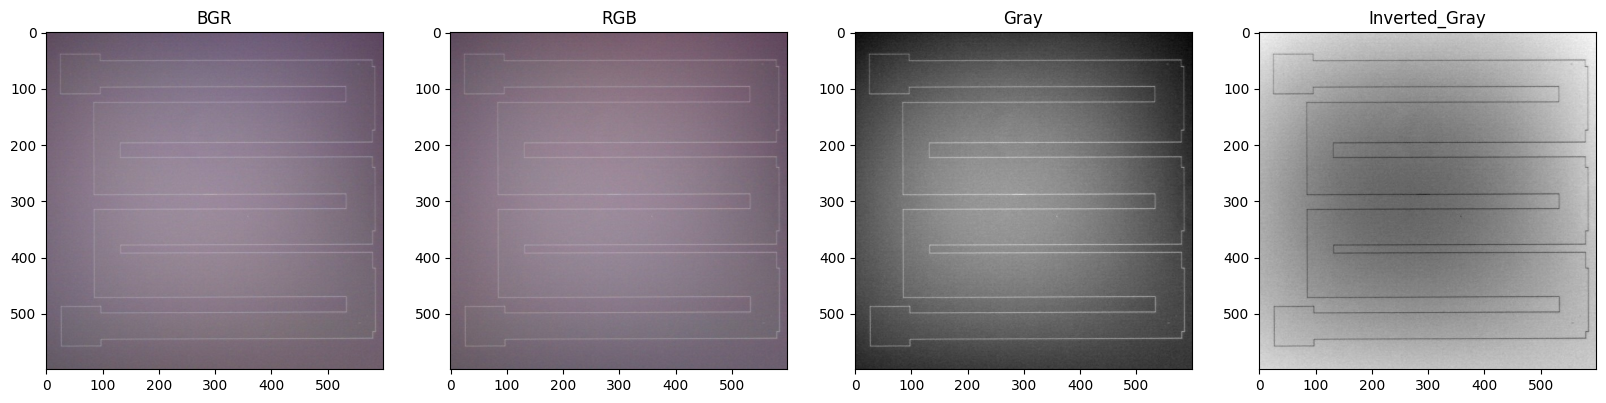

In [ ]:
import random
import cv2
import matplotlib.pyplot as plt

annotation_df = pd.read_csv('train.csv')
idx = random.randint(0, len(annotation_df)-1)
image_path = os.path.join("", annotation_df.iloc[idx, 1]) #use image path column (index = 1) in csv file

#########실습 : OpenCV를 이용하여 이미지를 읽어 들이고
######### 이미지를 Channel를 변경한다
image = cv2.imread(image_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # convert from BGR to RGB
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # convert from BGR to grat
image_converted = (255.0 - image_gray)/255.0  # minMax Scaling
###########################################################

plt.figure(figsize=(20,10))

ax=plt.subplot(1,4,1)
ax.title.set_text('BGR')
plt.imshow(image)

ax=plt.subplot(1,4,2)
ax.title.set_text('RGB')
plt.imshow(image_rgb)

ax=plt.subplot(1,4,3)
ax.title.set_text('Gray')
plt.imshow(image_gray, cmap='gray')

print(image_gray.shape)

ax=plt.subplot(1,4,4)
ax.title.set_text('Inverted_Gray')
plt.imshow(image_converted, cmap='gray')

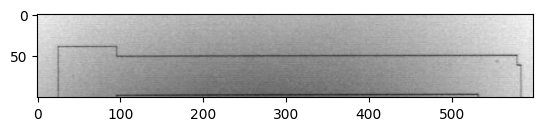

In [ ]:
plt.imshow(image_gray[0:100, :], cmap='gray_r')

# torchvision을 이용한 이미지 Transformation

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


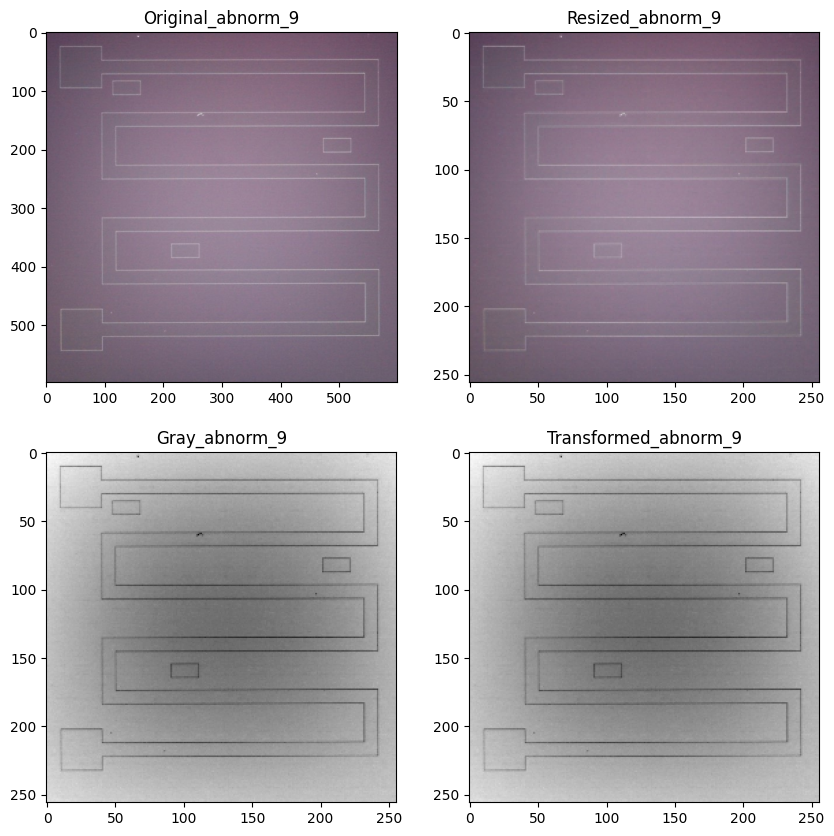

In [ ]:
# 입력 이미지를 정규화
import cv2    # openCV library
import torch
import numpy as np
from torchvision import transforms

### 이미지 읽어 들임
annotation_df = pd.read_csv('train.csv')
idx = random.randint(0, len(annotation_df)-1)
image_path = os.path.join("", annotation_df.iloc[idx, 1]) #use image path column (index = 1) in csv file
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # convert from BGR to RGB for matplotlib

class_name = annotation_df.iloc[idx,2]

############# 실습 : MinMax Scaling, Resize, Tensor의 순서 변경
image_resize =  transforms.Compose([transforms.ToTensor(), transforms.Resize((256,256))])(image_rgb).permute(1,2,0)


############# 실습 : MinMax Scaling, Resize, GrayScale변경, Tensor의 순서 변경
image_gray =  transforms.Compose([transforms.ToTensor(), transforms.Resize((256,256)),
                                    transforms.Grayscale(),])(image_rgb).permute(1,2,0)

############# 실습 : gray_scale 된 이미지는 맨 마지막 channel  부분을 제거해야 한다.
############# Tensor는 Squeeze() 함수를 이용하여 dimension을 제거 가능
image_gray = image_gray.squeeze(2)


############# 실습 : MinMax Scaling, Resize, GrayScale변경, Standardization, Tensor의 순서 변경
image_transformed =  transforms.Compose([transforms.ToTensor(), transforms.Resize((256,256)),
                                    transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)), # Standardize
                                    transforms.Grayscale(),
                                    ])(image_rgb).permute(1,2,0)

############# 실습 : gray_scale 된 이미지는 맨 마지막 channel  부분을 제거해야 한다.
############# Tensor는 Squeeze() 함수를 이용하여 dimension을 제거 가능
image_transformed = image_transformed.squeeze(2)

## 이미지 출력
plt.figure(figsize=(10,10))

ax=plt.subplot(2,2,1)
ax.title.set_text(f'Original_{class_name}')
plt.imshow(image_rgb)

ax=plt.subplot(2,2,2)
ax.title.set_text(f'Resized_{class_name}')
plt.imshow(image_resize)

ax=plt.subplot(2,2,3)
ax.title.set_text(f'Gray_{class_name}')
plt.imshow(image_gray, cmap='gray_r')

ax=plt.subplot(2,2,4)
ax.title.set_text(f'Transformed_{class_name}')
plt.imshow(image_transformed, cmap='gray_r')


# Custom데이터를 활용하기 위한 Dataset을 선언
- pytorch의 `dataloader`를 이용하기 위해서는 `torch.utils.data.Dataset` 클래스를 상속한 클래스의 선언이 필요하다.
- 클래스 내에 `__init__`, `__getitem__`, `__len__`의 3개의 메소드를 선언하여 오버라이드한다.

In [ ]:
import cv2
import torch
from torch.utils.data import Dataset

class semiconductorDataset(Dataset): # inheritin from Dataset class

    def __init__(self, csv_file, root_dir="", transform=None):
        self.annotation_df = pd.read_csv(csv_file)
        self.root_dir = root_dir # root directory of images, leave "" if using the image path column in the __getitem__ method
        self.transform = transform

    def __len__(self):
        return len(self.annotation_df) # return length (numer of rows) of the dataframe

    ############ 실습 : annotation_df에 있는 이미지를 읽어 들어서, 변경한후
    ############        읽어 들인 값을 return 하는 함수를 작성한다.
    def __getitem__(self, idx):

        ##### Image 읽기
        image_path = os.path.join(self.root_dir, self.annotation_df.iloc[idx, 1]) #use image path column (index = 1) in csv file
        image = cv2.imread(image_path) # read image by cv2
        #### 이미지를 Channel순서를 변경
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # convert from BGR to RGB for matplotlib
        #### 이미지 Transform
        if self.transform:
            image = self.transform(image)

        #### 이미지에 대한 추가 정보 확인
        class_name = self.annotation_df.iloc[idx, 2] # use class name column (index = 2) in csv file
        class_index = self.annotation_df.iloc[idx, 3] # use class index column (index = 3) in csv file

        return image, class_name, class_index

# torchvision을 이용한 Image Augmentation 추가

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


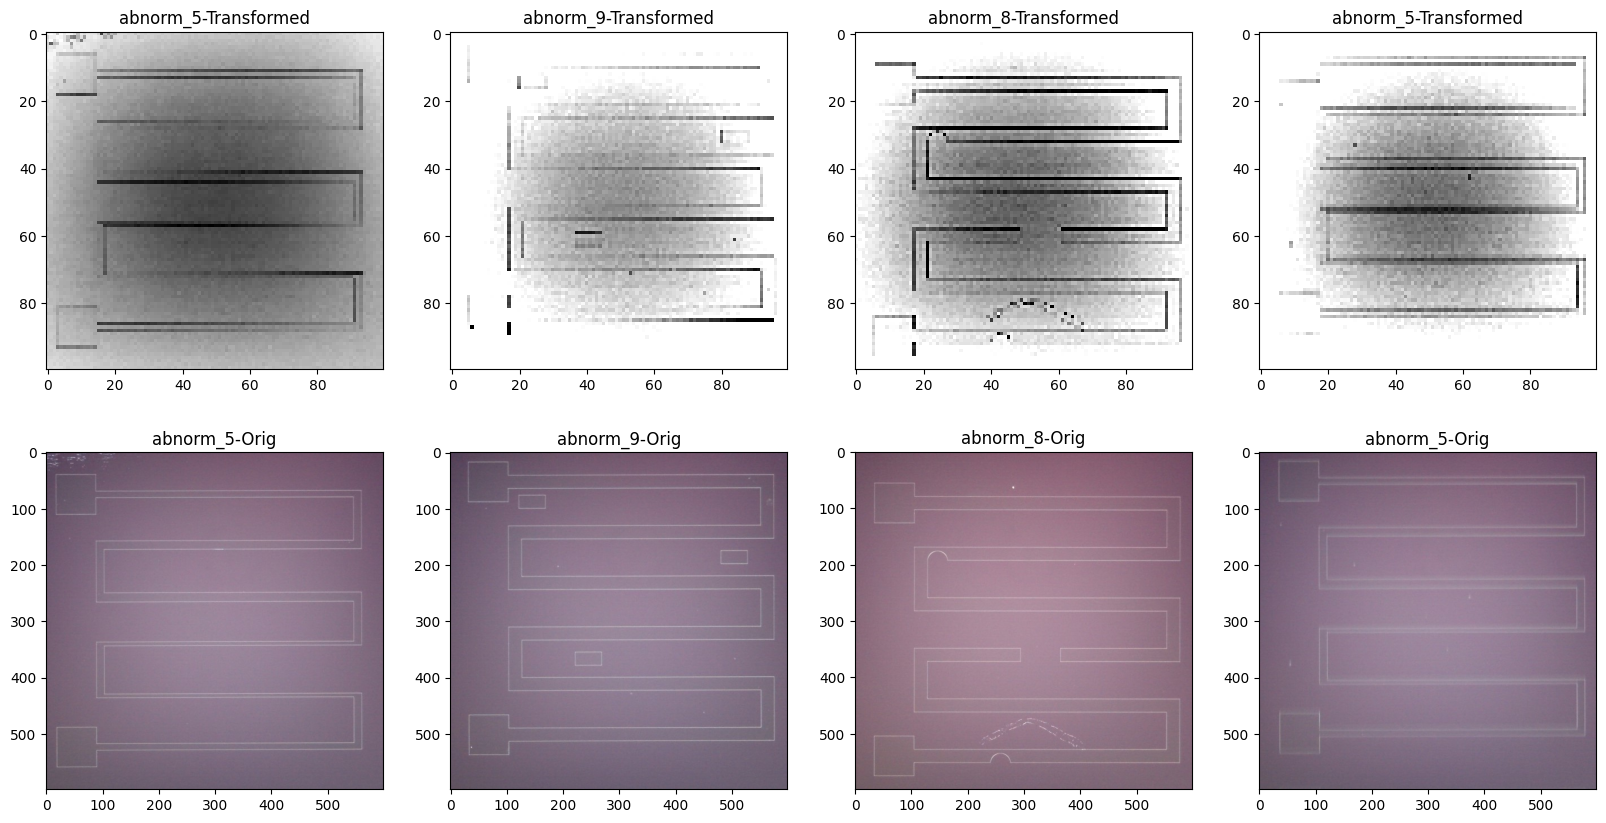

In [ ]:
# https://pytorch.org/vision/stable/auto_examples/plot_transforms.html#sphx-glr-auto-examples-plot-transforms-py
from torchvision import transforms
import matplotlib.pyplot as plt
import random

transform = transforms.Compose([
    transforms.ToTensor(), # PIL Image를 Tensor로 변경
    transforms.Resize((100,100)), # 크기 변경
    transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)), # Normalize
    transforms.Grayscale(), # Gray Scale로 변경

    #### 실습 : Sharpness와 Contrast를 임의로 변경하는  Transform 선언
    transforms.RandomAdjustSharpness(sharpness_factor=2), # randomly adjusts the sharpness
    transforms.RandomAutocontrast() # 임의로 Contrast변경
])

#### 실습 : transform을 수행하지 않는 경우와 transform 을 수행하는 두 경우를 비교한다
train_dataset = semiconductorDataset(csv_file='train.csv', root_dir="", transform=transform)
train_dataset_untransformed = semiconductorDataset(csv_file='train.csv', root_dir="", transform=None)

#visualize 10 random images from the loaded dataset
plt.figure(figsize=(20,10))
list_idx = [random.randint(0, len(train_dataset)-1) for _ in range(4)]

for i , idx in enumerate(list_idx):

    ### 실습 : 선언한 train_dataset에서 이미지를 가지고 온다.
    image, class_name, class_index = train_dataset[idx]
    ax=plt.subplot(2,4,i+1) # create an axis
    ax.title.set_text(class_name + '-' + 'Transformed')
    plt.imshow(image.squeeze(0), cmap='gray_r')

    ### 실습 : 선언한 train_dataset_untransformed 에서 이미지를 가지고 온다.
    image, class_name, class_index = train_dataset_untransformed[idx]
    ax=plt.subplot(2,4,i+5) # create an axis
    ax.title.set_text(class_name + '-' + 'Orig')
    plt.imshow(image)

# Batch 단위 학습을 위한 DataLoader 선언
 - Dataset내부의 샘플들을 batch 크기로 추출
 - Batch Size는 1step에 들어간 데이터의 개수
 - Epoch 마다 데이터를 섞어(Shuffle) Overfitting을 방지
 - 병렬처리를 지원하여 데이터 검색 속도를 향상


In [ ]:
#### 실습 : torch.utils.DataLoader를 이용하여 데이터를 load. Batch 크기를 2로 한다.
train_dataloader = torch.utils.data.DataLoader(train_dataset,batch_size=2,
                                               shuffle=True, num_workers=1)
##########################################################################################################
for i, data in enumerate(train_dataloader):
  images, class_name, labels = data
  print(images.shape, labels.shape)

  #5번 데이터를 load하고 멈춘다
  if i > 3:
    break




torch.Size([2, 1, 100, 100]) torch.Size([2])
torch.Size([2, 1, 100, 100]) torch.Size([2])
torch.Size([2, 1, 100, 100]) torch.Size([2])
torch.Size([2, 1, 100, 100]) torch.Size([2])
torch.Size([2, 1, 100, 100]) torch.Size([2])


## 이전에 MIST 실습에 활용한 모델을 이용하여 분류해 본다

In [ ]:

    # self.linear = nn.Sequential(nn.Linear(in_features=input_size, out_features=hidden_layer_size, bias=True),
    #                             nn.Sigmoid(),
    #                             nn.Linear(in_features=hidden_layer_size, out_features=int(hidden_layer_size/2), bias=True),
    #                             nn.Sigmoid(),
    #                             nn.Linear(in_features=int(hidden_layer_size/2), out_features=int(hidden_layer_size/4), bias=True),
    #                             nn.Sigmoid(),
    #                             nn.Linear(in_features=int(hidden_layer_size/4), out_features=int(hidden_layer_size/10), bias=True),
    #                             nn.Sigmoid(),
    #                             nn.Linear(in_features=int(hidden_layer_size/10), out_features=int(hidden_layer_size/100), bias=True),
    #                             nn.Sigmoid(),
    #                             nn.Linear(in_features=int(hidden_layer_size/100), out_features=output_size, bias=True),
    #                             # nn.Softmax()
    #                         )


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

class LinearRegressionModel(nn.Module):

  def __init__(self, input_size, hidden_layer_size, output_size):
    super().__init__()
    self.linear = nn.Sequential(nn.Linear(in_features=input_size, out_features=hidden_layer_size, bias=True),
                                nn.Sigmoid(),
                                nn.Linear(in_features=hidden_layer_size, out_features=hidden_layer_size, bias=True),
                                nn.Sigmoid(),
                                nn.Linear(in_features=hidden_layer_size, out_features=output_size, bias=True),
                                # nn.Softmax()
                            )

  def forward(self, x):
      return self.linear(x)

In [ ]:
nb_epochs = 100 # 원하는만큼 경사 하강법을 반복

## 실습 : 입력 크기 100*100, 11개의 Class 를 맞추는 모델 생성
model = LinearRegressionModel(input_size=100*100, hidden_layer_size=1000, output_size=11)

## 실습 : CorssEntropyLoss()를 선언
loss =  nn.CrossEntropyLoss() # 내부적으로 소프트맥스 함수를 포함하고 있음.

for epoch in range(nb_epochs + 1):


  ###실습 : CustomDataLoader를 이용하여 Batch 별로 학습
  for i, data in enumerate(train_dataloader, 0):
    x_train, _, y_train = data
    x_train = x_train.reshape(len(x_train), -1)
    #####################################################

    optimizer = torch.optim.SGD( model.parameters(), lr=0.1)

    preds = model(x_train)
    cost = loss(preds, y_train)

    ### 실습 :  Backpropagation
    optimizer.zero_grad() # 초기화
    cost.backward() # gradient계산
    optimizer.step() # 계산된 gradient 값을 이용하여 W,b 업데이트

  if epoch % (nb_epochs/10) == 1:
    print(f'Epoch {epoch:4d}/{nb_epochs}, Cost_train: {cost.item():.6f}')

Epoch    1/100, Cost_train: 2.503702
Epoch   11/100, Cost_train: 2.355822
Epoch   21/100, Cost_train: 2.423440
Epoch   31/100, Cost_train: 2.169174
Epoch   41/100, Cost_train: 2.319575
Epoch   51/100, Cost_train: 2.436837
Epoch   61/100, Cost_train: 2.390250
Epoch   71/100, Cost_train: 2.460004
Epoch   81/100, Cost_train: 2.184304


# 정확도를 평가해 봅시다


In [ ]:
### 실습 : 한꺼번에 모둔 데이터를 가져오는 dataloader
train_dataloader = torch.utils.data.DataLoader(train_dataset,batch_size=len(train_dataset), shuffle=True, num_workers=1)
for i, data in enumerate(train_dataloader):
  x_train, _, y_train = data
  x_train = x_train.reshape(len(x_train), -1)

print(x_train.shape, y_train.shape)

preds = model(x_train)

print("학습 후 예측결과")
prediction_label = np.argmax(preds.detach().numpy(), axis=1)

#### 실습 : Tensor to numpy 로 변경 후 정확도 파악
train_labels = y_train.numpy()
print(f"Train accuracy(%):  {100*np.sum((prediction_label == train_labels))/len(train_labels):.2f}")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(train_labels, prediction_label))